In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [5]:
# read dataset into dataFrame, overview of dataset
strokeData = pd.read_csv("..\..\data\\raw\strokeDataset.csv")
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# count null values
strokeData['bmi'].isna().sum()

201

0    4861
1     249
Name: stroke, dtype: int64

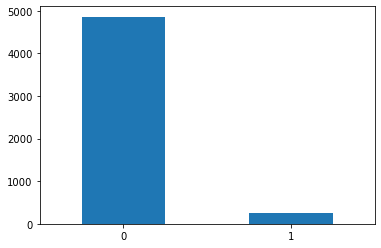

In [4]:
# count number of stroke occurrence
strokeCount = strokeData['stroke'].value_counts()

# display stroke counts in graphical format
strokeCount.plot(kind='bar', rot=0)
strokeCount

In [5]:
# summary of dataset
strokeData.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
strokeData.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110,NaN,NaN,NaN,36517.8,21161.7,67,17741.2,36932,54682,72940
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110,NaN,NaN,NaN,43.2266,22.6126,0.08,25,45,61,82
hypertension,5110,NaN,NaN,NaN,0.097456,0.296607,0,0,0,0,1
heart_disease,5110,NaN,NaN,NaN,0.0540117,0.226063,0,0,0,0,1
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110,NaN,NaN,NaN,106.148,45.2836,55.12,77.245,91.885,114.09,271.74
bmi,4909,NaN,NaN,NaN,28.8932,7.85407,10.3,23.5,28.1,33.1,97.6


In [7]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
strokeData.shape

(5110, 12)

In [9]:
# removing duplicates from dataset
strokeData.drop_duplicates(subset='id', keep=False, inplace=True)

In [10]:
strokeData

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
# replace NaN bmi values with bmi mean
strokeData['bmi'].fillna(value=strokeData['bmi'].mean(), inplace=True)
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
# check gender type & count
strokeData['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [13]:
strokeData['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
# replace 'others' in gender to 'male'
strokeData = strokeData.replace(to_replace='Other', value='Male')
strokeData.head()
strokeData['gender'].describe()

count       5110
unique         2
top       Female
freq        2994
Name: gender, dtype: object

In [15]:
strokeData['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [16]:
strokeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [17]:
# create instance for OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'hypertension'),
 Text(3.5, 0, 'heart_disease'),
 Text(4.5, 0, 'avg_glucose_level'),
 Text(5.5, 0, 'bmi'),
 Text(6.5, 0, 'stroke')]

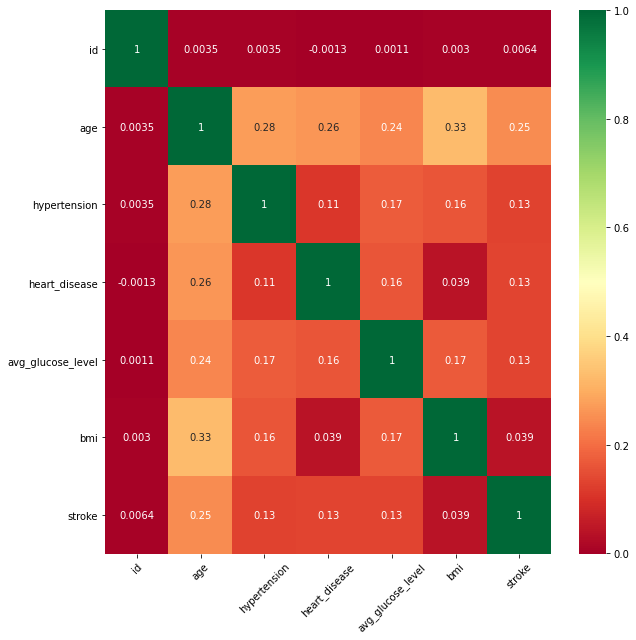

In [25]:
corrmat = strokeData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heatmap
raw_RFE = sns.heatmap(strokeData[top_corr_features].corr(), annot=True, cmap="RdYlGn")
raw_RFE.set_xticklabels(g.get_xticklabels(), rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'hypertension'),
  Text(2.5, 0, 'heart_disease'),
  Text(3.5, 0, 'avg_glucose_level'),
  Text(4.5, 0, 'bmi'),
  Text(5.5, 0, 'stroke')])

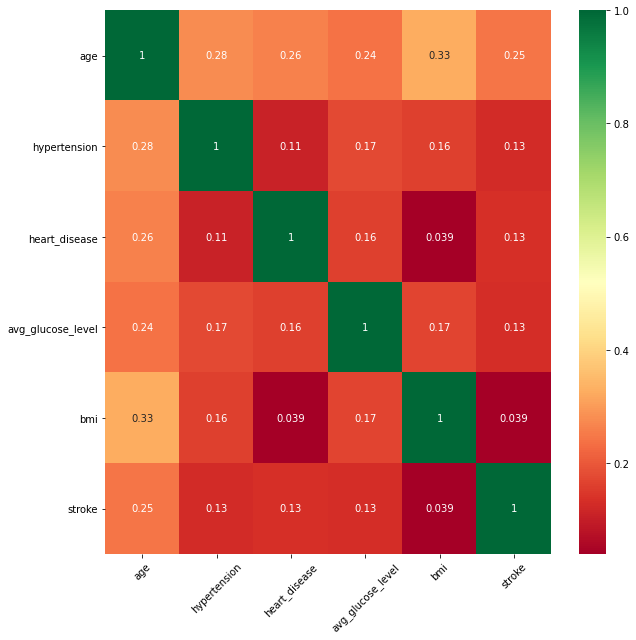

In [24]:
# strokeData = strokeData.drop('id', axis=1)

corrmat = strokeData.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heatmap
raw_RFE = sns.heatmap(strokeData[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.xticks(rotation=45)